In [1]:
from model import *
from data import *

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(1,'dataset/datas/','allimages','allmasks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_covid.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=1,epochs=20,callbacks=[model_checkpoint])

C:\Users\prast\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\prast\AppData\Local\Temp/ipykernel_21072/3228081962.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(myGene,steps_per_epoch=1,epochs=20,callbacks=[model_checkpoint])


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 512, 512, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

### test your model and save predicted results

In [2]:
testGene = testGenerator("dataset/alltest/")
model = unet()
model.load_weights("unet_covid.hdf5")
results = model.predict_generator(testGene,10,verbose=1)
# saveResult("dataset/alltest",results)

C:\Users\prast\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\prast\AppData\Local\Temp/ipykernel_21668/3189175099.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  results = model.predict_generator(testGene,10,verbose=1)


10/10 [==============================] - 19s 2s/step


In [3]:
results.shape

(10, 512, 512, 1)

In [4]:
import matplotlib.pyplot as plt


In [13]:
plt.imsave('predict-0.jpg',results[0,:,:,0],cmap="gray")

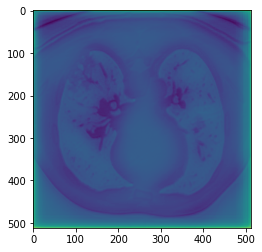

In [6]:
plt.imshow(results[0,:,:,:])

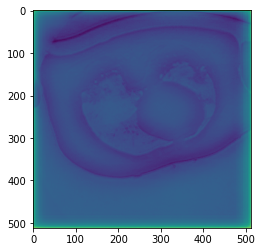

In [7]:
plt.imshow(results[1,:,:,:])

In [9]:
results[0,:,:,:].shape



(512, 512, 1)